<a href="https://colab.research.google.com/github/prasath9944/Time-Series/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://raw.githubusercontent.com/sunnysavita10/time-series/main/TSLA.CSV

In [2]:
!pip install yfinance

!pip install pmdarima
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import yfinance as yf
from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
stock_data=pd.read_csv('https://raw.githubusercontent.com/sunnysavita10/time-series/main/TSLA.CSV')

In [6]:
stock_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0


In [8]:
stock_data=stock_data[['Date','Close']]

In [9]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [11]:
stock_data['Date']=pd.to_datetime(stock_data['Date'])

In [12]:
stock_data.head()

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002


In [13]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [15]:
stock_data=stock_data.set_index('Date')

In [16]:
stock_data.head()

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002


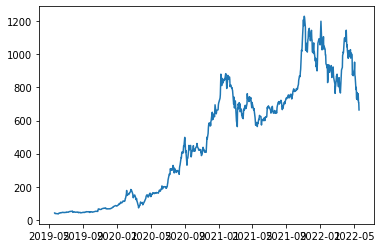

In [17]:
plt.plot(stock_data['Close'])

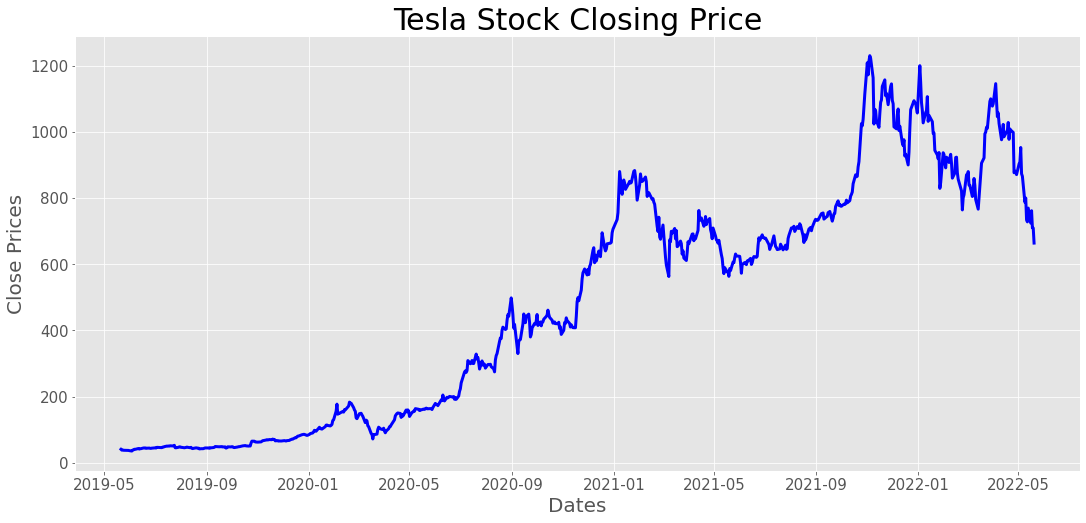

In [18]:
# plotting close price
plt.style.use('ggplot')
plt.figure(figsize=(18,8)) 
plt.grid(True) 
plt.xlabel('Dates', fontsize = 20) 
plt.xticks(fontsize = 15)
plt.ylabel('Close Prices', fontsize = 20)
plt.yticks(fontsize = 15) 
plt.plot(stock_data['Close'], linewidth = 3, color = 'blue')
plt.title('Tesla Stock Closing Price', fontsize = 30)
plt.show()

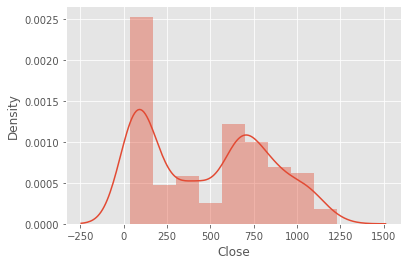

In [19]:
import seaborn as sns
sns.distplot(stock_data['Close'])

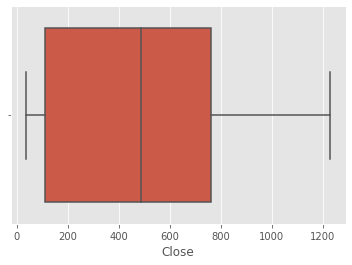

In [20]:
sns.boxplot(stock_data['Close'])

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
result = seasonal_decompose(stock_data[['Close']], model='additive', extrapolate_trend='freq', period=20)

In [52]:
stock_data['Close'].head()

Date
2019-05-21    41.015999
2019-05-22    38.546001
2019-05-23    39.098000
2019-05-24    38.125999
2019-05-28    37.740002
Name: Close, dtype: float64

In [53]:
result.seasonal

Date
2019-05-21    8.727107
2019-05-22    7.567277
2019-05-23    2.702018
2019-05-24    5.295112
2019-05-28    2.896484
                ...   
2022-05-16    4.281102
2022-05-17    3.549957
2022-05-18    2.686290
2022-05-19    2.257697
2022-05-20    6.580808
Name: seasonal, Length: 758, dtype: float64

In [54]:
result.trend

Date
2019-05-21     37.277099
2019-05-22     37.589388
2019-05-23     37.901677
2019-05-24     38.213965
2019-05-28     38.526254
                 ...    
2022-05-16    781.509158
2022-05-17    770.996586
2022-05-18    760.484013
2022-05-19    749.971441
2022-05-20    739.458869
Name: trend, Length: 758, dtype: float64

In [55]:
result.trend.isna().sum()

0

In [56]:
result.resid

Date
2019-05-21    -4.988208
2019-05-22    -6.610664
2019-05-23    -1.505695
2019-05-24    -5.383078
2019-05-28    -3.682737
                ...    
2022-05-16   -61.420264
2022-05-17   -12.936557
2022-05-18   -53.360306
2022-05-19   -42.809155
2022-05-20   -82.139652
Name: resid, Length: 758, dtype: float64

In [57]:
result.resid.isna().sum()

0

<Figure size 1440x720 with 0 Axes>

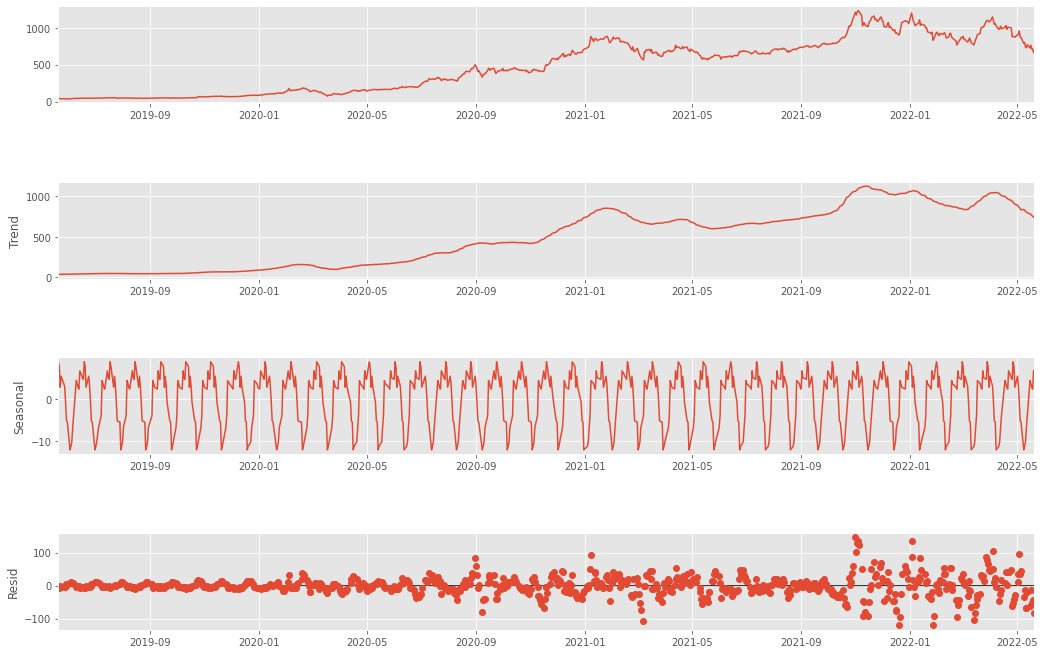

In [58]:
fig=plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)

In [59]:
result = seasonal_decompose(stock_data[['Close']], model='multiplicative', extrapolate_trend='freq', period=30)

<Figure size 1440x720 with 0 Axes>

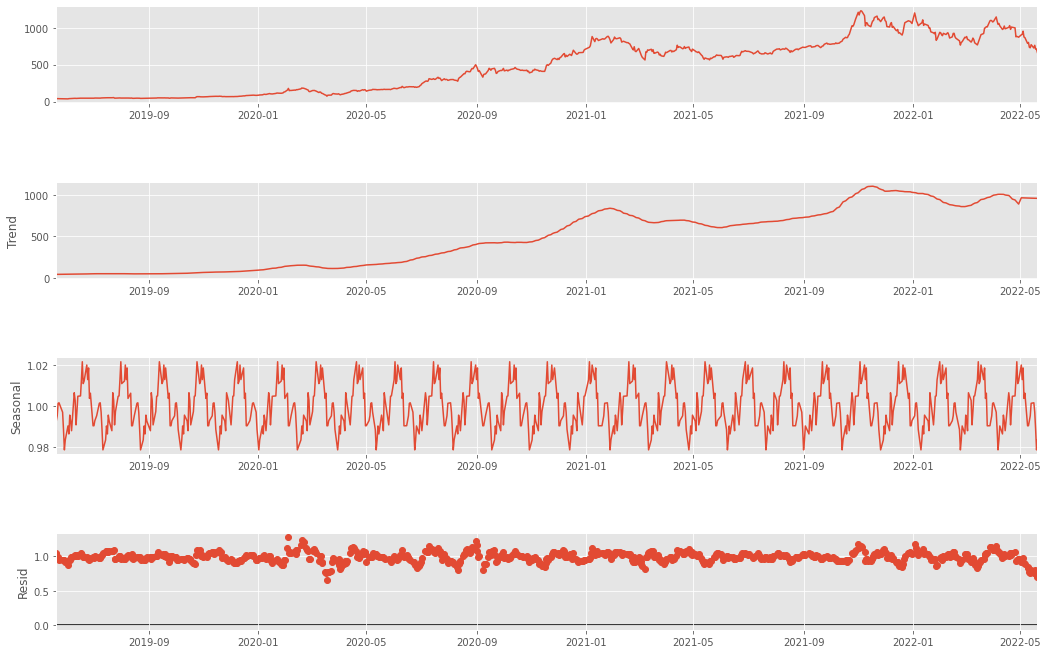

In [60]:
fig=plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)

In [61]:
#Test for staionarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(12).mean() # rolling mean
    rolstd = timeseries.rolling(12).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

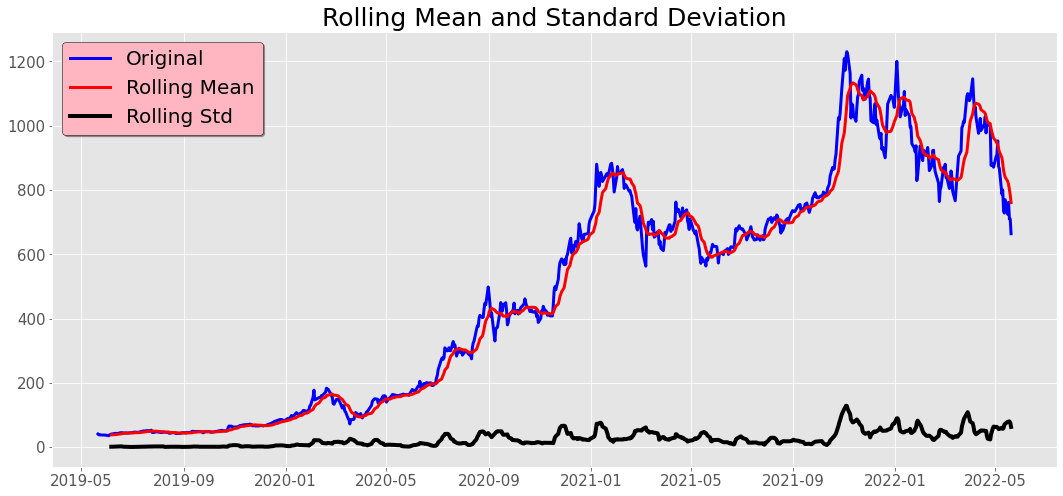

Results of dickey fuller test
Test Statistics                 -1.363009
p-value                          0.599876
No. of lags used                 9.000000
Number of observations used    748.000000
critical value (1%)             -3.439123
critical value (5%)             -2.865412
critical value (10%)            -2.568832
dtype: float64


In [62]:
test_stationarity(stock_data['Close'])

In [63]:
df_close=stock_data['Close']

In [71]:
# Get the difference of each Adj Close point
tsla_close_diff_1 = df_close.diff()

In [72]:
tsla_close_diff_1.dropna(inplace=True)

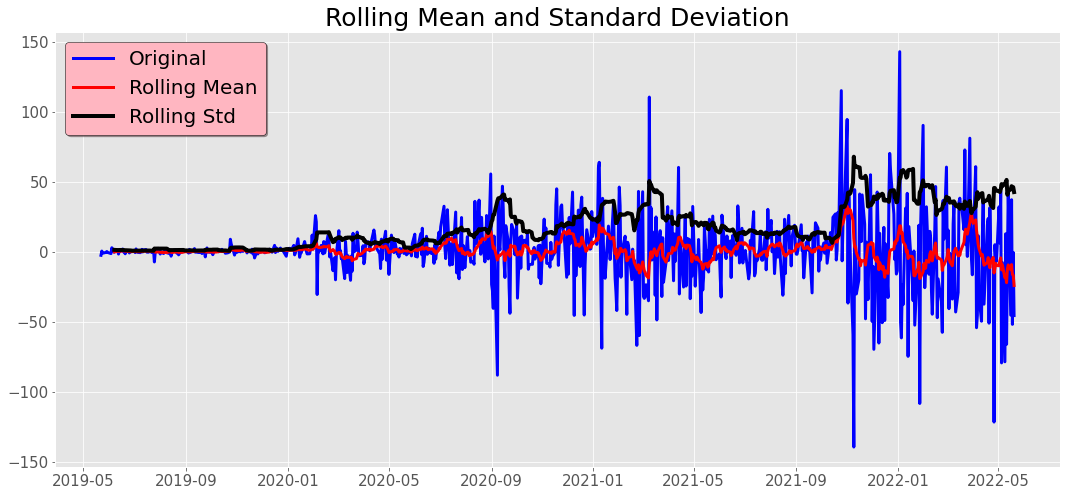

Results of dickey fuller test
Test Statistics               -8.324564e+00
p-value                        3.498786e-13
No. of lags used               8.000000e+00
Number of observations used    7.480000e+02
critical value (1%)           -3.439123e+00
critical value (5%)           -2.865412e+00
critical value (10%)          -2.568832e+00
dtype: float64


In [73]:

# Plot the tsla Adj Close 1st order difference
test_stationarity(tsla_close_diff_1)

<h1>Arima</h1>

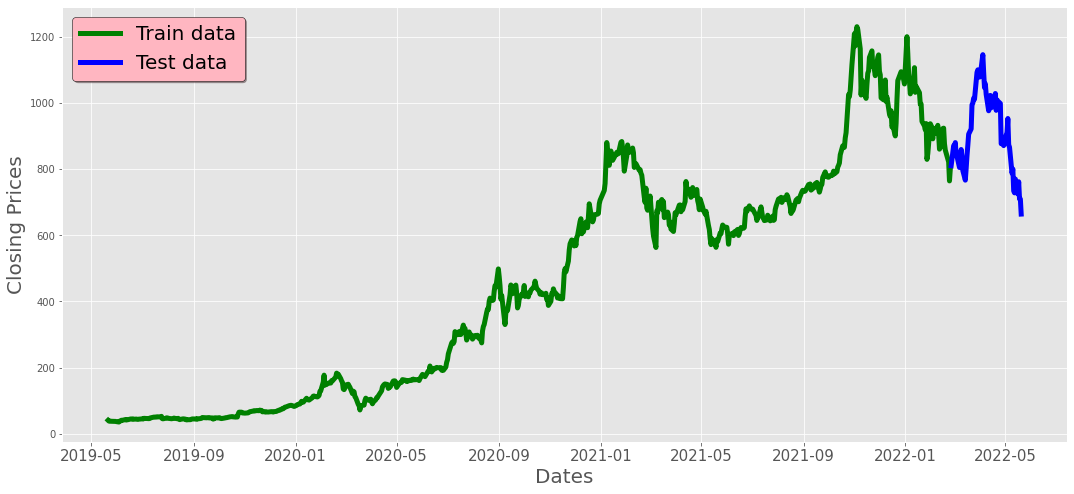

In [74]:
#split data into train and training set
train_data=df_close[0:-60]
test_data=df_close[-60:]
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.ylabel('Closing Prices', fontsize = 20)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.plot(train_data, 'green', label='Train data', linewidth = 5)
plt.plot(test_data, 'blue', label='Test data', linewidth = 5)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')